In [28]:
# # prompt: mount google drive and copy a csv file and also unmount

# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/Colab\ Notebooks/recv_dupli.csv /content/
# !cp /content/drive/MyDrive/Colab\ Notebooks/close_dupli.csv /content/

# !ls
# drive.flush_and_unmount()


In [29]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import warnings
from matplotlib.pyplot import figure

In [30]:
today_price_df = pd.read_csv("recv_dupli.csv")

columns_to_drop = ['companyName', 'change', 'pChange', 'updatedOn',
                   'previousClose', 'previousOpen', 'dayHigh', 'dayLow',
                   'totalTradedValue', 'totalTradedQuantity', 'buy', 'sell']

today_price_df.drop(columns=columns_to_drop, inplace = True)

def convert_to_int(value):
    try:
        # Split the value into numeric and text parts
        parts = value.strip().split()

        # Extract the numeric part and remove commas
        numeric_value = float(parts[0].replace(',', ''))

        # If the value contains 'Lakh', multiply by 100,000
        if 'Lakh' in parts:
            numeric_value *= 100000

        # If the value contains 'Cr.', multiply by 10,000,000
        elif 'Cr.' in parts:
            numeric_value *= 10000000

        # Round to the nearest integer
        result = int(round(numeric_value))

        return result

    except ValueError:
        # Return None if the conversion fails
        return None

# Apply the conversion function to each column
today_price_df['2WeekAvgQuantity'] = today_price_df['2WeekAvgQuantity'].apply(convert_to_int)
today_price_df['marketCapFull'] = today_price_df['marketCapFull'].apply(convert_to_int)
today_price_df['marketCapFreeFloat'] = today_price_df['marketCapFreeFloat'].apply(convert_to_int)


In [31]:
# Assuming timed_df is your DataFrame indexed by date
orig_df = pd.read_csv("close_dupli.csv")
timed_df = orig_df.fillna(0)

timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)
# Set the desired start and end dates
start_date = '2022-11-01'
end_date = '2023-01-01'

# Use loc to select rows within the specified date range
# timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 5  # Replace with your desired number

# Use iloc to select the first num_columns_to_keep columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]
timed_df

,ABB,AEGISLOG,AMARAJABAT,AMBALALSA,ANDHRAPET,ANSALAPI,UTIQUE,ARUNAHTEL,BOMDYEING,ASIANHOTNR,...,INDUSTOWER,COVIDH,VMART,NIBE,CNEL,MUKTA,MYSTICELE,COMFINCAP,INRADIA,STDSHOE
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,53.989998,0.000000,0.000000,0.000000,0.000000,0.0,0.0,96.300003,14.839999,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.0,0.0
2000-01-04,52.599998,0.000000,0.000000,0.000000,0.000000,0.0,0.0,96.300003,14.579999,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.0,0.0
2000-01-05,52.200001,0.000000,0.000000,0.000000,0.000000,0.0,0.0,96.300003,13.799999,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.0,0.0
2000-01-06,56.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,96.300003,14.189999,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.0,0.0
2000-01-07,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,96.300003,13.299999,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,4132.799805,326.799988,644.150024,40.500000,77.339996,0.0,0.0,15.870000,145.449997,139.600006,...,180.800003,0.0,1999.000000,0.0,0.0,3.25,3.46,8.45,0.0,0.0
2023-10-09,4095.149902,322.700012,634.549988,41.310001,74.269997,14.3,0.0,14.930000,141.300003,129.649994,...,178.949997,0.0,1966.150024,0.0,0.0,3.37,3.29,9.28,0.0,0.0
2023-10-10,4189.149902,323.299988,635.250000,42.130001,74.580002,0.0,0.0,15.000000,149.949997,133.500000,...,187.449997,0.0,1946.650024,0.0,0.0,3.33,3.45,9.41,0.0,0.0


In [32]:
sym = "NMDC"
timed_df = timed_df[sym]

In [33]:
config = {
    "data": {
        "window_size": 20,
        "train_split_size": 0.80,
    },
    "plots": {
        "show_plots": True,
        "xticks_interval": 90,
        "color_actual": "#001f3f",
        "color_train": "#3D9970",
        "color_val": "#0074D9",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
    },
    "model": {
        "input_size": 1, # since we are only using 1 feature, close price
        "num_lstm_layers": 2,
        "lstm_size": 32,
        "dropout": 0.2,
    },
    "training": {
        "device": "cpu", # "cuda" or "cpu"
        "batch_size": 64,
        "num_epoch": 30,
        "learning_rate": 0.01,
        "scheduler_step_size": 30,
    }
}

Number data points: 5859 from  + 2000-01-03 00:00:00 to 2023-10-12 00:00:00


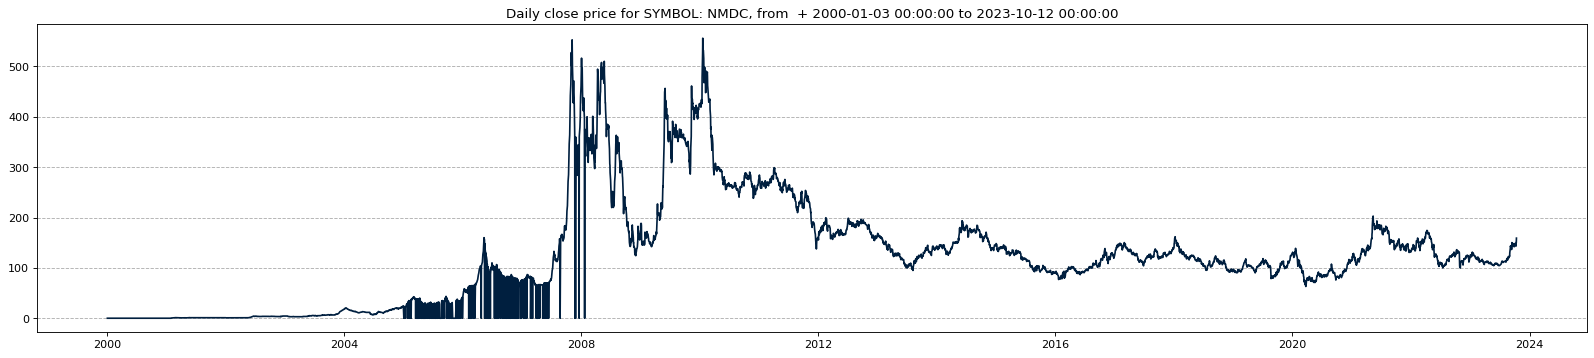

In [34]:
data_date = [date for date in timed_df.keys()]
# data_date.reverse()
data_close_price = [i for i in timed_df]
# data_close_price.reverse()
data_close_price = np.array(data_close_price)
num_data_points = len(data_date)
display_date_range = f"from  + {data_date[0]} to {data_date[num_data_points-1]}"
print("Number data points:", num_data_points, display_date_range)

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
# plt.xticks(x, xticks, rotation='vertical')
plt.grid(visible=None,which='major', axis='y', linestyle='--')
plt.title("Daily close price for " + f"SYMBOL: {sym}" + ", " + display_date_range)
plt.show()


In [35]:
class Normalizer():
    def __init__(self):
        self.mu = None
        self.sd = None
    
    def fit_transform(self, x):
        self.mu = np.mean(x, axis=(0), keepdims=True)
        self.sd = np.std(x, axis=(0), keepdims=True)
        normalized_x = (x - self.mu)/self.sd
        return normalized_x
    
    def transform(self,x):
        normalized_x = (x-self.mu)/self.sd
        return normalized_x

    def inverse_transform(self, x):
        return (x*self.sd) + self.mu

# normalize
scaler = Normalizer()
normalized_data_close_price = scaler.fit_transform(np.array(timed_df))

In [36]:
def prepare_data_x(x, window_size):
    # perform windowing
    n_row = x.shape[0] - window_size + 1
    output = np.lib.stride_tricks.as_strided(x, shape=(n_row,window_size), strides=(x.strides[0],x.strides[0]))
    return output[:-1], output[-1]

def prepare_data_y(x, window_size):
    # # perform simple moving average
    # output = np.convolve(x, np.ones(window_size), 'valid') / window_size

    # use the next day as label
    output = x[window_size:]
    return output

def prepare_data(normalized_data_close_price, config):
    data_x, data_x_unseen = prepare_data_x(normalized_data_close_price, window_size=config["data"]["window_size"])
    data_y = prepare_data_y(normalized_data_close_price, window_size=config["data"]["window_size"])

    # split dataset

    split_index = int(data_y.shape[0]*config["data"]["train_split_size"])
    data_x_train = data_x[:split_index]
    data_x_val = data_x[split_index:]
    data_y_train = data_y[:split_index]
    data_y_val = data_y[split_index:]


    return split_index, data_x_train, data_y_train, data_x_val, data_y_val, data_x_unseen

split_index, data_x_train, data_y_train, data_x_val, data_y_val, data_x_unseen = prepare_data(normalized_data_close_price, config)


In [37]:
normalized_data_close_price

array([-1.16288048, -1.16288048, -1.16288048, ...,  0.27420797,
        0.27277414,  0.35736504])

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [39]:
class TimeSeriesDataset(Dataset):
    def __init__(self, x, y):
        x = np.expand_dims(x, 2) # in our case, we have only 1 feature, so we need to convert `x` into [batch, sequence, features] for LSTM
        self.x = x.astype(np.float32)
        self.y = y.astype(np.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])

dataset_train = TimeSeriesDataset(data_x_train, data_y_train)
dataset_val = TimeSeriesDataset(data_x_val, data_y_val)

print("Train data shape", dataset_train.x.shape, dataset_train.y.shape)
print("Validation data shape", dataset_val.x.shape, dataset_val.y.shape)

Train data shape (4671, 20, 1) (4671,)
Validation data shape (1168, 20, 1) (1168,)


In [40]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.linear_1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(num_layers*hidden_layer_size, output_size)

        self.init_weights()

    def init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'bias' in name:
                 nn.init.constant_(param, 0.0)
            elif 'weight_ih' in name:
                 nn.init.kaiming_normal_(param)
            elif 'weight_hh' in name:
                 nn.init.orthogonal_(param)

    def forward(self, x):
        batchsize = x.shape[0]

        # layer 1
        x = self.linear_1(x)
        x = self.relu(x)

        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # reshape output from hidden cell into [batch, features] for `linear_2`
        x = h_n.permute(1, 0, 2).reshape(batchsize, -1)

        # layer 2
        x = self.dropout(x)
        predictions = self.linear_2(x)
        return predictions[:,-1]

model = LSTMModel(input_size=config["model"]["input_size"], hidden_layer_size=config["model"]["lstm_size"], num_layers=config["model"]["num_lstm_layers"], output_size=1, dropout=config["model"]["dropout"])
model = model.to(config["training"]["device"])

In [41]:
def run_epoch(dataloader, is_training=False):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for idx, (x, y) in enumerate(dataloader):
        if is_training:
            optimizer.zero_grad()

        batchsize = x.shape[0]

        x = x.to(config["training"]["device"])
        y = y.to(config["training"]["device"])

        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += (loss.detach().item() / batchsize)

    lr = scheduler.get_last_lr()[0]

    return epoch_loss, lr

# create `DataLoader`
train_dataloader = DataLoader(dataset_train, batch_size=config["training"]["batch_size"], shuffle=True)
val_dataloader = DataLoader(dataset_val, batch_size=config["training"]["batch_size"], shuffle=True)

# define optimizer, scheduler and loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=config["training"]["learning_rate"], betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=config["training"]["scheduler_step_size"], gamma=0.1)

# begin training
for epoch in range(config["training"]["num_epoch"]):
    loss_train, lr_train = run_epoch(train_dataloader, is_training=True)
    loss_val, lr_val = run_epoch(val_dataloader)
    scheduler.step()

    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
              .format(epoch+1, config["training"]["num_epoch"], loss_train, loss_val, lr_train))



Epoch[1/30] | loss train:0.101601, test:0.000580 | lr:0.010000
Epoch[2/30] | loss train:0.051218, test:0.000538 | lr:0.010000
Epoch[3/30] | loss train:0.043213, test:0.001627 | lr:0.010000
Epoch[4/30] | loss train:0.044413, test:0.000623 | lr:0.010000
Epoch[5/30] | loss train:0.042425, test:0.001986 | lr:0.010000
Epoch[6/30] | loss train:0.041173, test:0.000623 | lr:0.010000
Epoch[7/30] | loss train:0.042910, test:0.000627 | lr:0.010000
Epoch[8/30] | loss train:0.042598, test:0.004536 | lr:0.010000
Epoch[9/30] | loss train:0.038942, test:0.000902 | lr:0.010000
Epoch[10/30] | loss train:0.044297, test:0.000526 | lr:0.010000
Epoch[11/30] | loss train:0.039297, test:0.000942 | lr:0.010000
Epoch[12/30] | loss train:0.041558, test:0.000842 | lr:0.010000
Epoch[13/30] | loss train:0.039112, test:0.000516 | lr:0.010000
Epoch[14/30] | loss train:0.040960, test:0.000363 | lr:0.010000
Epoch[15/30] | loss train:0.037587, test:0.000416 | lr:0.010000
Epoch[16/30] | loss train:0.043185, test:0.000384

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

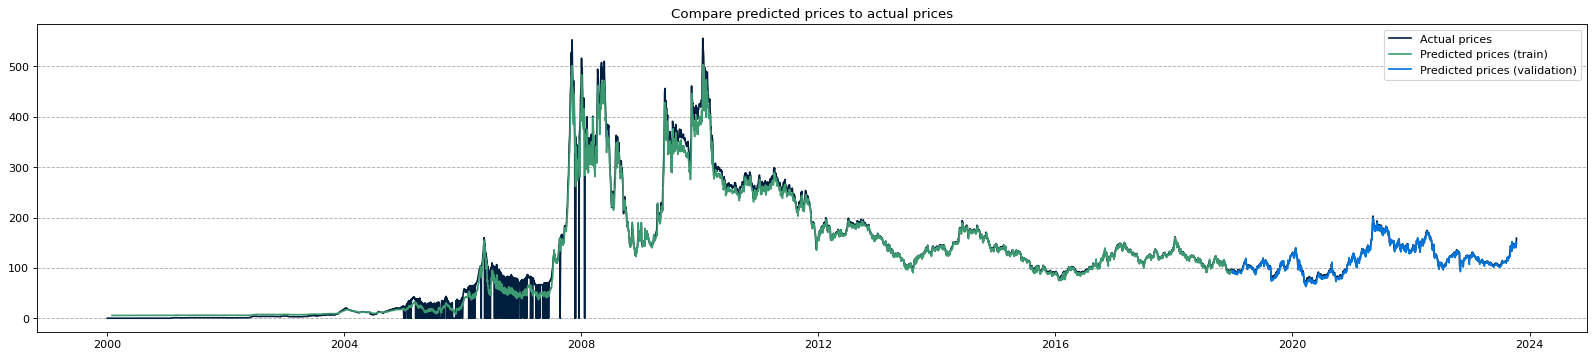

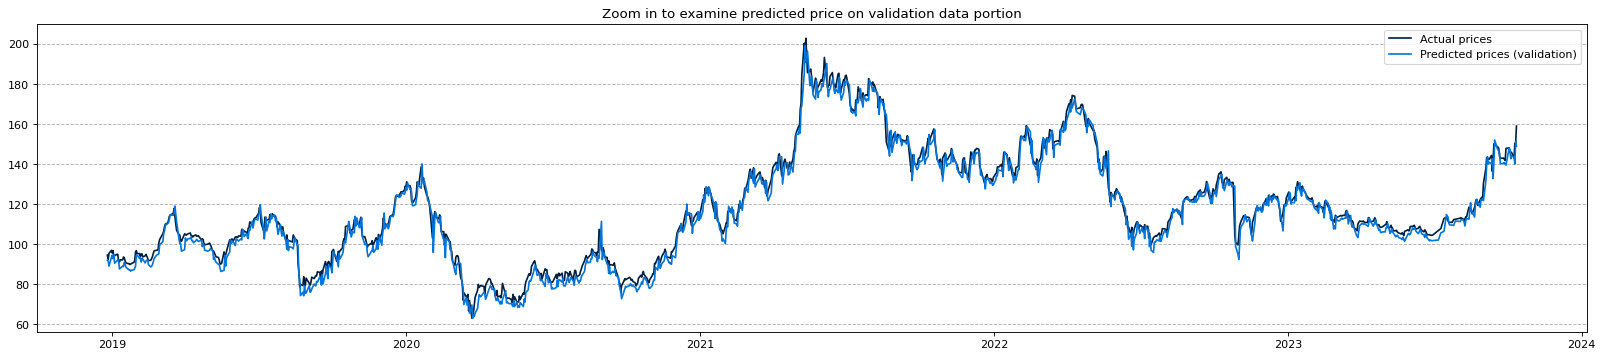

In [43]:
# here we re-initialize dataloader so the data doesn't shuffled, so we can plot the values by date

train_dataloader = DataLoader(dataset_train, batch_size=config["training"]["batch_size"], shuffle=False)
val_dataloader = DataLoader(dataset_val, batch_size=config["training"]["batch_size"], shuffle=False)

model.eval()

# predict on the training data, to see how well the model managed to learn and memorize

predicted_train = np.array([])

for idx, (x, y) in enumerate(train_dataloader):
    x = x.to(config["training"]["device"])
    out = model(x)
    out = out.cpu().detach().numpy()
    predicted_train = np.concatenate((predicted_train, out))

# predict on the validation data, to see how the model does

predicted_val = np.array([])

for idx, (x, y) in enumerate(val_dataloader):
    x = x.to(config["training"]["device"])
    out = model(x)
    out = out.cpu().detach().numpy()
    predicted_val = np.concatenate((predicted_val, out))

if config["plots"]["show_plots"]:

    # prepare data for plotting, show predicted prices

    to_plot_data_y_train_pred = np.zeros(num_data_points)
    to_plot_data_y_val_pred = np.zeros(num_data_points)

    to_plot_data_y_train_pred[config["data"]["window_size"]:split_index+config["data"]["window_size"]] = scaler.inverse_transform(predicted_train)
    to_plot_data_y_val_pred[split_index+config["data"]["window_size"]:] = scaler.inverse_transform(predicted_val)

    to_plot_data_y_train_pred = np.where(to_plot_data_y_train_pred == 0, None, to_plot_data_y_train_pred)
    to_plot_data_y_val_pred = np.where(to_plot_data_y_val_pred == 0, None, to_plot_data_y_val_pred)

    # plots

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(data_date, data_close_price, label="Actual prices", color=config["plots"]["color_actual"])
    plt.plot(data_date, to_plot_data_y_train_pred, label="Predicted prices (train)", color=config["plots"]["color_pred_train"])
    plt.plot(data_date, to_plot_data_y_val_pred, label="Predicted prices (validation)", color=config["plots"]["color_pred_val"])
    plt.title("Compare predicted prices to actual prices")
    xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
    x = np.arange(0,len(xticks))
    # plt.xticks(x, xticks, rotation='vertical')
    plt.grid(visible=None, which='major', axis='y', linestyle='--')
    plt.legend()
    plt.show()

    # prepare data for plotting, zoom in validation

    to_plot_data_y_val_subset = scaler.inverse_transform(data_y_val)
    to_plot_predicted_val = scaler.inverse_transform(predicted_val)
    to_plot_data_date = data_date[split_index+config["data"]["window_size"]:]

    # plots

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(to_plot_data_date, to_plot_data_y_val_subset, label="Actual prices", color=config["plots"]["color_actual"])
    plt.plot(to_plot_data_date, to_plot_predicted_val, label="Predicted prices (validation)", color=config["plots"]["color_pred_val"])
    plt.title("Zoom in to examine predicted price on validation data portion")
    xticks = [to_plot_data_date[i] if ((i%int(config["plots"]["xticks_interval"]/5)==0 and (len(to_plot_data_date)-i) > config["plots"]["xticks_interval"]/6) or i==len(to_plot_data_date)-1) else None for i in range(len(to_plot_data_date))] # make x ticks nice
    xs = np.arange(0,len(xticks))
    # plt.xticks(xs, xticks, rotation='vertical')
    plt.grid(visible=None, which='major', axis='y', linestyle='--')
    plt.legend()
    plt.show()

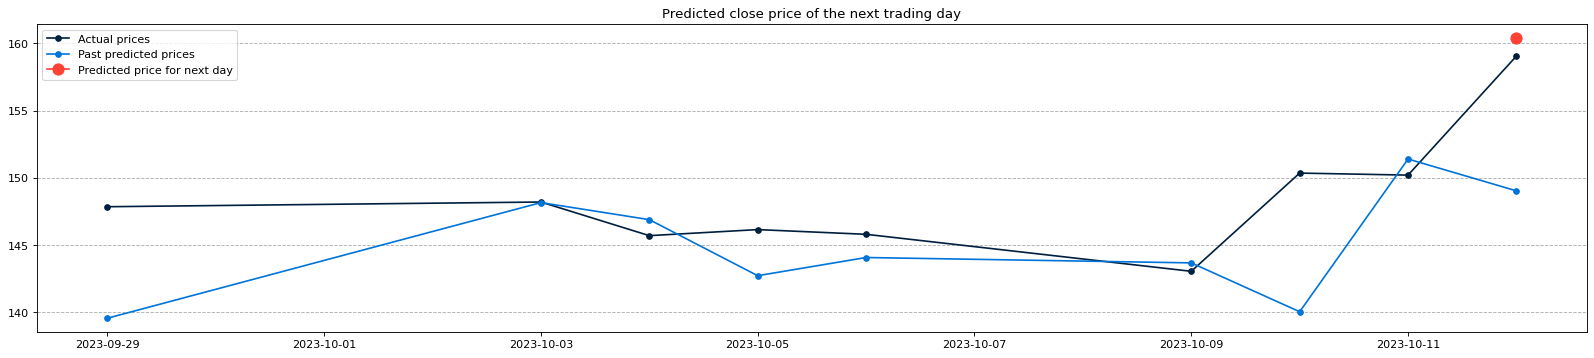

Predicted close price of the next trading day: 160.37


In [44]:
# predict on the unseen data, tomorrow's price

model.eval()

x = torch.tensor(data_x_unseen).float().to(config["training"]["device"]).unsqueeze(0).unsqueeze(2) # this is the data type and shape required, [batch, sequence, feature]
prediction = model(x)
prediction = prediction.cpu().detach().numpy()
prediction = scaler.inverse_transform(prediction)[0]

if config["plots"]["show_plots"]:

    # prepare plots

    plot_range = 10
    to_plot_data_y_val = np.zeros(plot_range)
    to_plot_data_y_val_pred = np.zeros(plot_range)
    to_plot_data_y_test_pred = np.zeros(plot_range)

    to_plot_data_y_val[:plot_range-1] = scaler.inverse_transform(data_y_val)[-plot_range+1:]
    to_plot_data_y_val_pred[:plot_range-1] = scaler.inverse_transform(predicted_val)[-plot_range+1:]

    to_plot_data_y_test_pred[plot_range-1] = prediction

    to_plot_data_y_val = np.where(to_plot_data_y_val == 0, None, to_plot_data_y_val)
    to_plot_data_y_val_pred = np.where(to_plot_data_y_val_pred == 0, None, to_plot_data_y_val_pred)
    to_plot_data_y_test_pred = np.where(to_plot_data_y_test_pred == 0, None, to_plot_data_y_test_pred)

    # plot

    plot_date_test = data_date[-plot_range+1:]
    plot_date_test.append(data_date[-1])

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(plot_date_test, to_plot_data_y_val, label="Actual prices", marker=".", markersize=10, color=config["plots"]["color_actual"])
    plt.plot(plot_date_test, to_plot_data_y_val_pred, label="Past predicted prices", marker=".", markersize=10, color=config["plots"]["color_pred_val"])
    plt.plot(plot_date_test, to_plot_data_y_test_pred, label="Predicted price for next day", marker=".", markersize=20, color=config["plots"]["color_pred_test"])
    plt.title("Predicted close price of the next trading day")
    plt.grid(visible=None, which='major', axis='y', linestyle='--')
    plt.legend()
    plt.show()

print("Predicted close price of the next trading day:", round(prediction, 2))



In [45]:
data_x_unseen, prediction
data_unseen: list = list(data_x_unseen)
data_unseen

[0.1967857914325198,
 0.27277414113764126,
 0.2670392566558259,
 0.26034833932188833,
 0.2522238831773467,
 0.2125569060673617,
 0.20443244992282003,
 0.20395450642069882,
 0.20443244992282003,
 0.19821947609100368,
 0.19344033276555103,
 0.2503122550167416,
 0.25365756783583054,
 0.22976185120856724,
 0.23406305103189867,
 0.2307177382128097,
 0.20443244992282003,
 0.2742079716440049,
 0.27277414113764126,
 0.3573650363373053]

In [46]:
preds = []
for i in range(30):
    data_unseen = list(data_unseen)

    # dat_x_unseen = scaler.transform([prediction])
    model.eval()
    x = torch.tensor(data_unseen).float().to(config["training"]["device"]).unsqueeze(
        0).unsqueeze(2)  # this is the data type and shape required, [batch, sequence, feature]
    prediction = model(x)
    prediction = prediction.cpu().detach().numpy()
    # prediction = scaler.inverse_transform(prediction)[0]
    data_unseen.append(prediction[0])
    # print(data_unseen)
    data_unseen.pop(0)
    data_unseen = np.array(data_unseen)
    preds.append(prediction)

In [47]:
np.array(preds)

array([[ 0.37001514],
       [ 0.3612327 ],
       [ 0.33982164],
       [ 0.31663886],
       [ 0.29525876],
       [ 0.2747851 ],
       [ 0.2521163 ],
       [ 0.22661734],
       [ 0.19773123],
       [ 0.16874667],
       [ 0.14190856],
       [ 0.11692026],
       [ 0.09337255],
       [ 0.07103188],
       [ 0.04979391],
       [ 0.02957271],
       [ 0.01032809],
       [-0.0062326 ],
       [-0.01968971],
       [-0.03352471],
       [-0.05209486],
       [-0.07700801],
       [-0.11006849],
       [-0.15288812],
       [-0.20614934],
       [-0.2683614 ],
       [-0.3349026 ],
       [-0.3989715 ],
       [-0.4547462 ],
       [-0.4999159 ]], dtype=float32)

In [48]:
r = scaler.inverse_transform(preds)
for i in r:
    print(i[0])

160.37347330043895
159.45464268725598
157.21459046148408
154.78917883728295
152.55236616835754
150.41038614763863
148.03874680195034
145.37101383126526
142.34891262782475
139.31651125494975
136.50867446605545
133.89436690121798
131.43077667865663
129.0934668139782
126.87152445928785
124.75595664843107
122.74256037599002
121.00995947477544
119.60206022931408
118.15462529490786
116.2117922764442
113.605347418515
110.14651871925645
105.66667461708386
100.09441858413417
93.58571548354266
86.62408866187883
79.92112127897585
74.08590302723819
69.36019090301582


In [49]:
df = pd.DataFrame(r)

In [50]:
# df.plot()
for i in range(30):
    print(r[i][0])

160.37347330043895
159.45464268725598
157.21459046148408
154.78917883728295
152.55236616835754
150.41038614763863
148.03874680195034
145.37101383126526
142.34891262782475
139.31651125494975
136.50867446605545
133.89436690121798
131.43077667865663
129.0934668139782
126.87152445928785
124.75595664843107
122.74256037599002
121.00995947477544
119.60206022931408
118.15462529490786
116.2117922764442
113.605347418515
110.14651871925645
105.66667461708386
100.09441858413417
93.58571548354266
86.62408866187883
79.92112127897585
74.08590302723819
69.36019090301582


Last Date :  2023-10-12 00:00:00

30th Date from last date 2023-11-11 00:00:00
Number data points: 5889 from  + 2000-01-03 00:00:00 to 2023-11-11 00:00:00


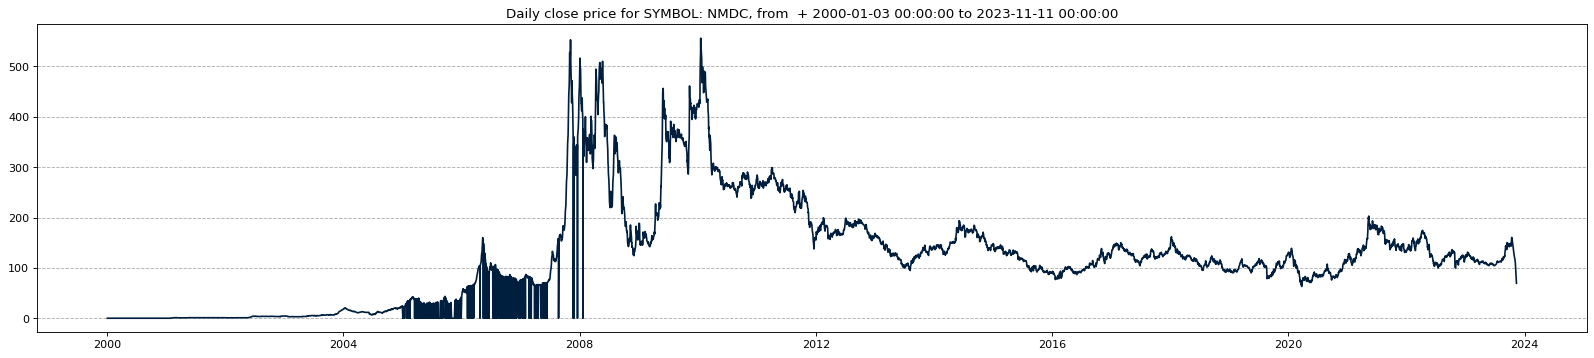

In [51]:
data_date = [date for date in timed_df.keys()]
# data_date.reverse()
# print(timed_df.keys)

data_close_price = [i for i in timed_df]

print("Last Date : ", data_date[-1])
print()
## Add next 30 days
for i in range(30):
    data_date.append(data_date[-1] + datetime.timedelta(1))
    data_close_price.append(r[i][0])
print("30th Date from last date", data_date[-1])
# data_close_price.reverse()
data_close_price = np.array(data_close_price)
num_data_points = len(data_date)
display_date_range = f"from  + {data_date[0]} to {data_date[num_data_points-1]}"
print("Number data points:", num_data_points, display_date_range)

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i % config["plots"]["xticks_interval"] == 0 and (num_data_points-i) > config["plots"]
                           ["xticks_interval"]) or i == num_data_points-1) else None for i in range(num_data_points)]  # make x ticks nice
x = np.arange(0, len(xticks))
# plt.xticks(x, xticks, rotation='vertical')
plt.grid(visible=None, which='major', axis='y', linestyle='--')
plt.title("Daily close price for " +
          f"SYMBOL: {sym}" + ", " + display_date_range)
plt.show()

In [52]:
# column_to_drop = 'UTIQUE'

# timed_df = timed_df.drop(column_to_drop, axis=1)


In [53]:
# timed_df.dropna(inplace = True)

In [54]:
# Show daily returns
returns = timed_df.pct_change()
returns.fillna(0, inplace=True)
returns.replace([np.inf, -np.inf], 0, inplace=True)

returns

Date
2000-01-03    0.000000
2000-01-04    0.000000
2000-01-05    0.000000
2000-01-06    0.000000
2000-01-07    0.000000
                ...   
2023-10-06   -0.002395
2023-10-09   -0.018861
2023-10-10    0.051031
2023-10-11   -0.000998
2023-10-12    0.058921
Name: NMDC, Length: 5859, dtype: float64

In [55]:
# Annualized covariance matrix

cov_matrix_annual = returns.cov()*252
cov_matrix_annual.fillna(0, inplace=True)
cov_matrix_annual

TypeError: Series.cov() missing 1 required positional argument: 'other'

In [ ]:
weights = np.full(timed_df.shape[1], 1 / timed_df.shape[1])
weights

In [ ]:
# Calculate PORTFOLIO variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

In [ ]:
# Calculate PORTFOLIO volatility (std. dev)
port_volatility = np.sqrt(port_variance)
port_volatility

In [ ]:
# Annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

In [ ]:
# DISPLAY

percent_var = str(round(port_variance, 2)*100) + "%"
percent_vol = str(round(port_volatility, 2)*100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print ("Expected Annual Return: " + percent_ret)
print ("Annual Volatility: " + percent_vol)
print ("Annual Variance: " + percent_var)

# OPTIMAZATION

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(timed_df)

In [ ]:
# S = np.cov(timed_df, rowvar=False)
# S = (S + S.T) / 2  # Enforce symmetry
# S.(0, inplace=True)


In [ ]:
S = risk_models.sample_cov(timed_df)
# S = (S + S.T) / 2

# # S = np.array(S)
# S.is_hermitian()

In [ ]:
# S = risk_models.CovarianceShrinkage(timed_df).ledoit_wolf()
# S.fillna(0, inplace=True)
# S = np.array(S)


In [ ]:
S

In [ ]:
# S = (S + S.T) / 2

# sharpe ratio
ef = EfficientFrontier(mu, S)

weights = ef.max_sharpe()
refined_weights = ef.clean_weights()
print (refined_weights)
ef.portfolio_performance(verbose = True)

In [ ]:
refined_weights

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(timed_df)
# weights = refined_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.lp_portfolio()
print ("Discrete Allocation: " , allocation )
print ("Funds Remaining: " , leftover )


which is number of shares that can be bought